<a href="https://colab.research.google.com/github/kimdongha723/kdh723/blob/main/BTC_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pyupbit

In [254]:
#BTC 최근 200시간의 데이터 불러옴
df = pyupbit.get_ohlcv("KRW-iq", interval="minute60")
df

,open,high,low,close,volume,value
2022-09-10 09:00:00,7.42,7.45,7.31,7.36,4.885116e+07,3.605014e+08
2022-09-10 13:00:00,7.36,7.41,7.34,7.36,3.391136e+07,2.501834e+08
2022-09-10 17:00:00,7.36,7.39,7.33,7.36,2.543600e+07,1.870619e+08
2022-09-10 21:00:00,7.36,7.37,7.27,7.32,2.813705e+07,2.058305e+08
2022-09-11 01:00:00,7.32,7.42,7.29,7.42,2.178736e+07,1.598806e+08
...,...,...,...,...,...,...
2022-10-12 21:00:00,6.70,6.72,6.66,6.71,3.433561e+07,2.294429e+08
2022-10-13 01:00:00,6.71,6.71,6.68,6.69,6.034787e+06,4.040189e+07
2022-10-13 05:00:00,6.70,6.76,6.69,6.75,2.126428e+07,1.430115e+08
2022-10-13 09:00:00,6.71,6.82,6.47,6.51,1.315231e+08,8.664115e+08


In [255]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2022-09-10 09:00:00,7.36
1,2022-09-10 13:00:00,7.36
2,2022-09-10 17:00:00,7.36
3,2022-09-10 21:00:00,7.32
4,2022-09-11 01:00:00,7.42
...,...,...
195,2022-10-12 21:00:00,6.71
196,2022-10-13 01:00:00,6.69
197,2022-10-13 05:00:00,6.75
198,2022-10-13 09:00:00,6.51


In [256]:
#prophet 불러옴
from fbprophet import Prophet

In [257]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [258]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=50, freq='H')
forecast = model.predict(future)

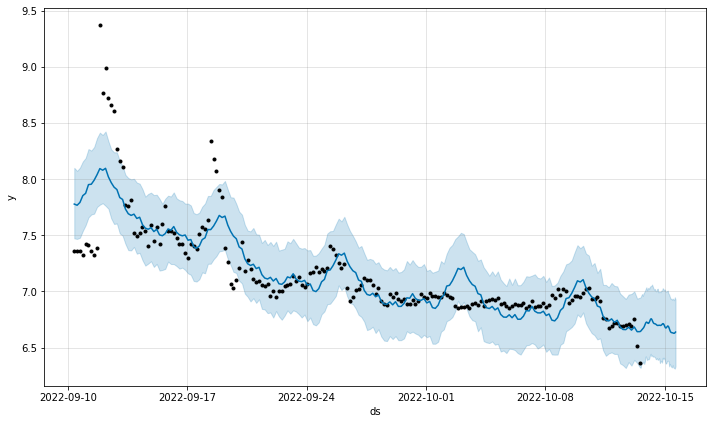

In [259]:
#그래프1
fig1 = model.plot(forecast)

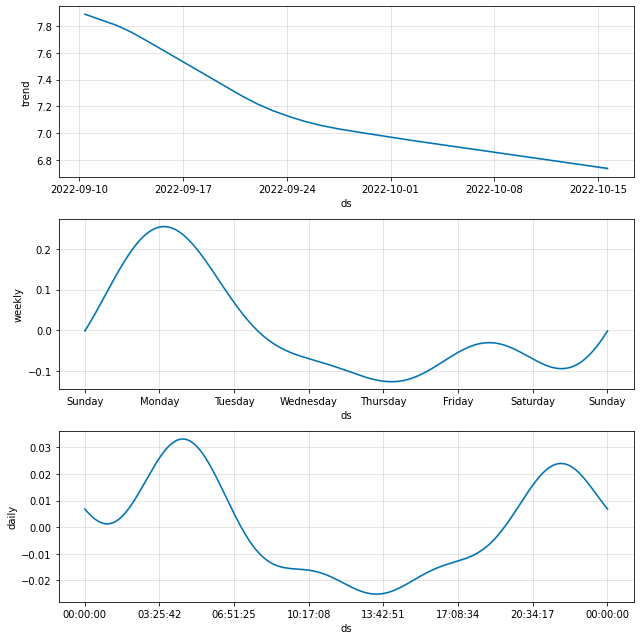

In [260]:
 #그래프2
fig2 = model.plot_components(forecast)